✅ Dataset loaded. Shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   


Summary statistics:
                           count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  121.656250   30.438286  44.000  99.75000   
BloodPressure 

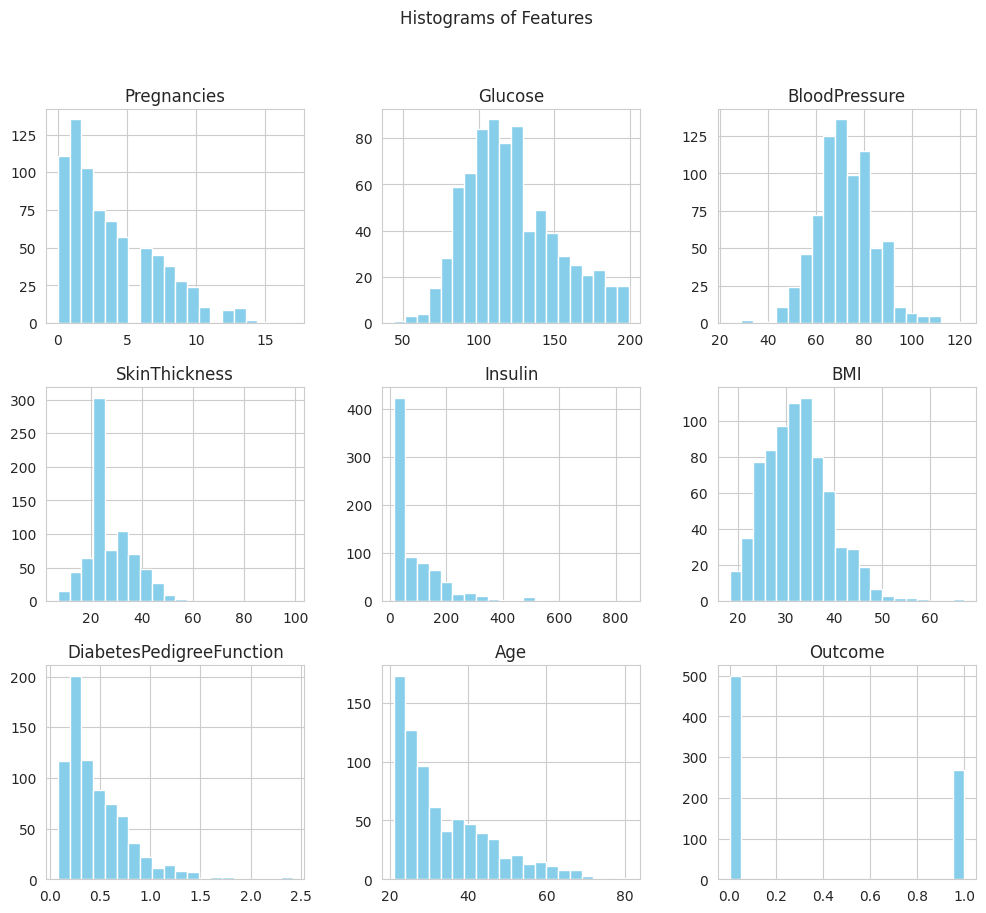

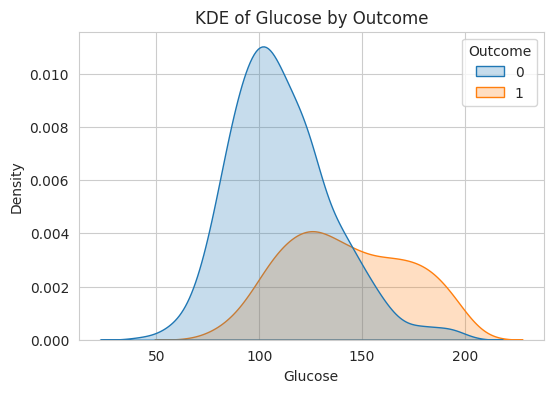

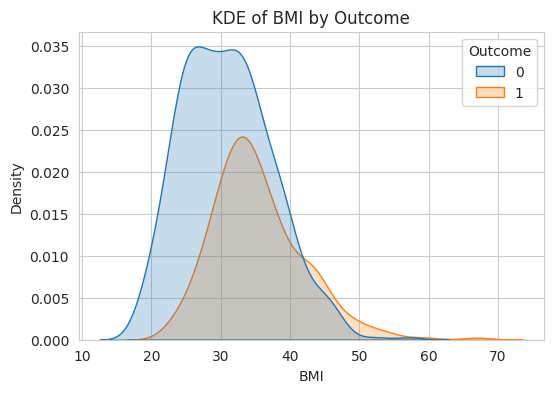

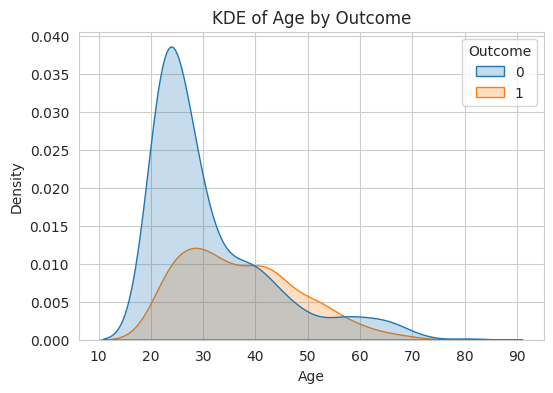

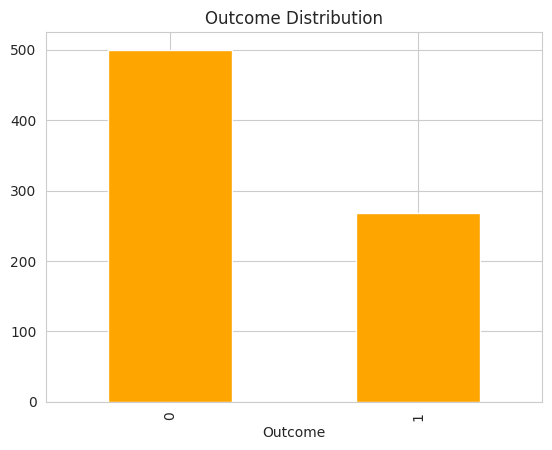

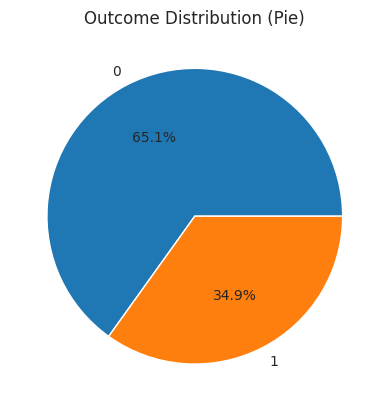

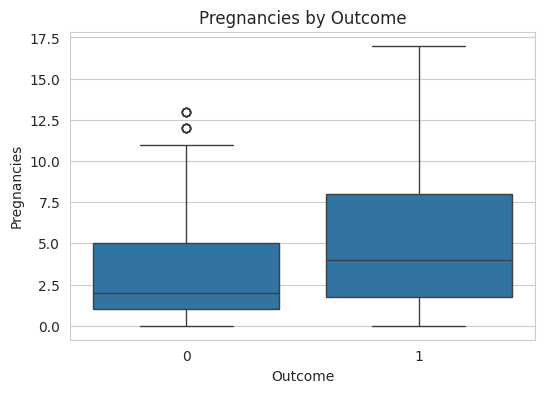

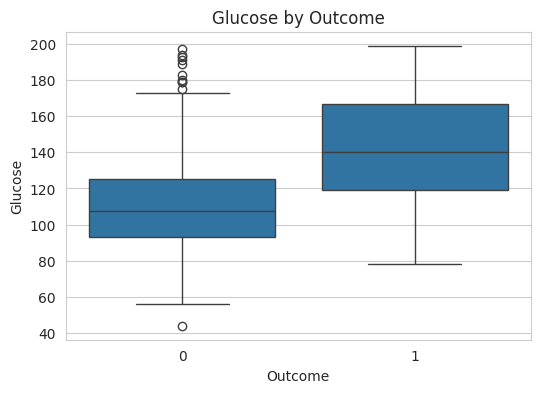

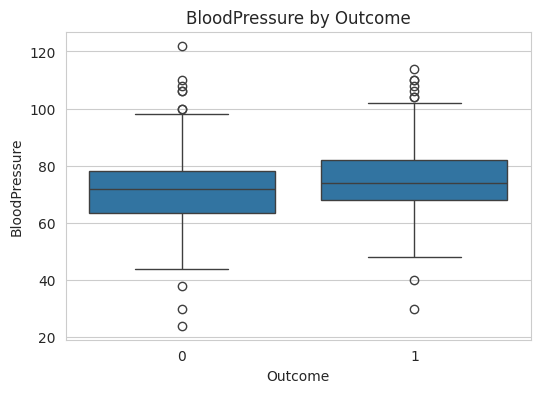

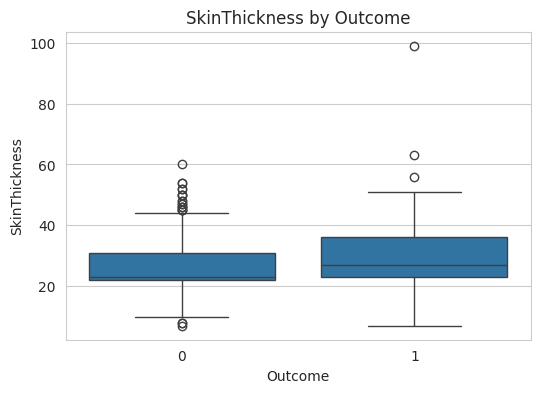

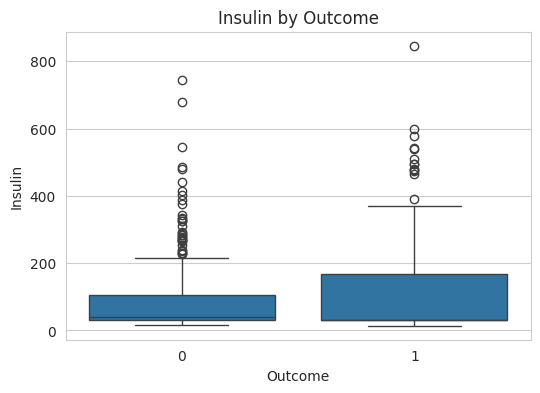

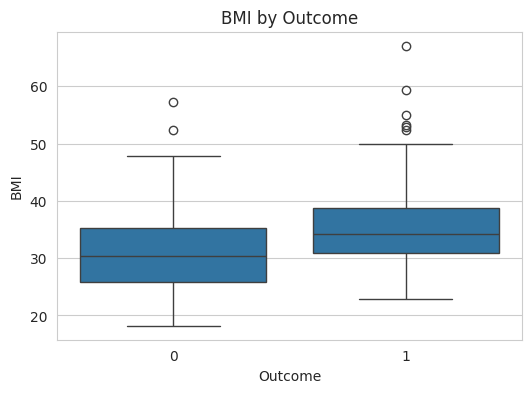

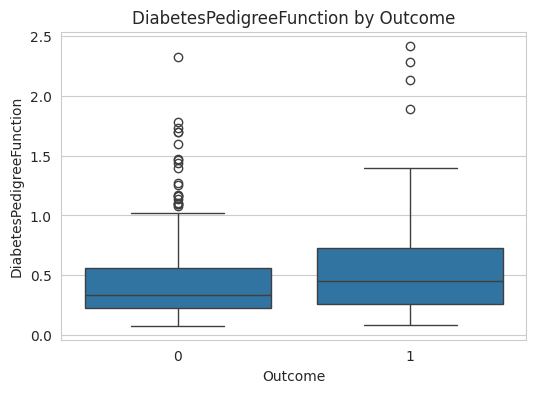

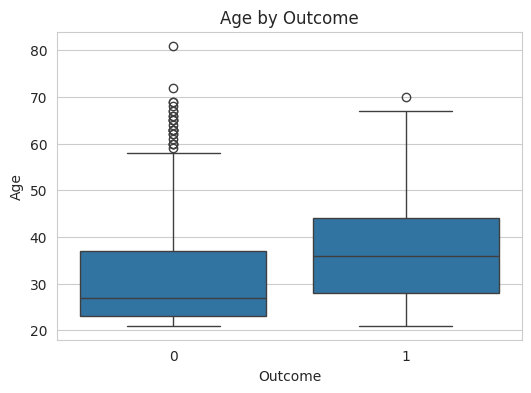

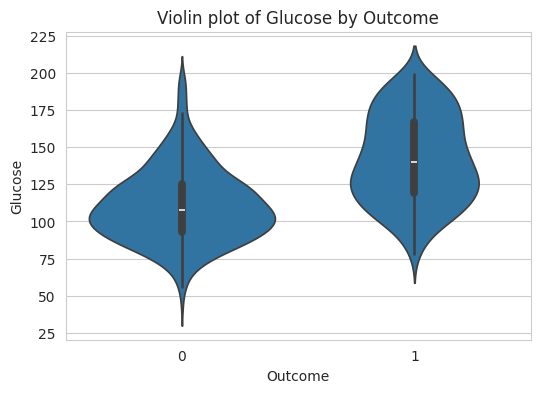

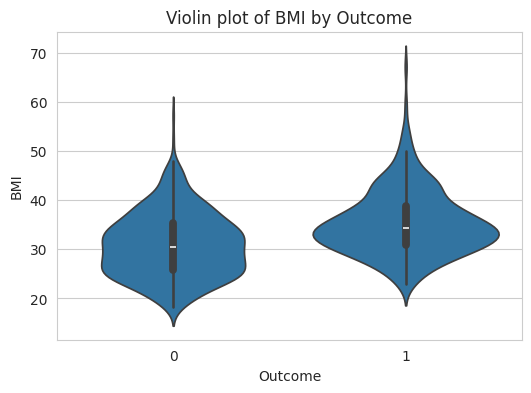

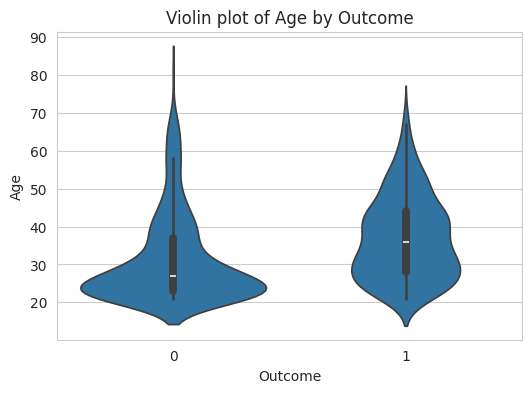

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 11.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


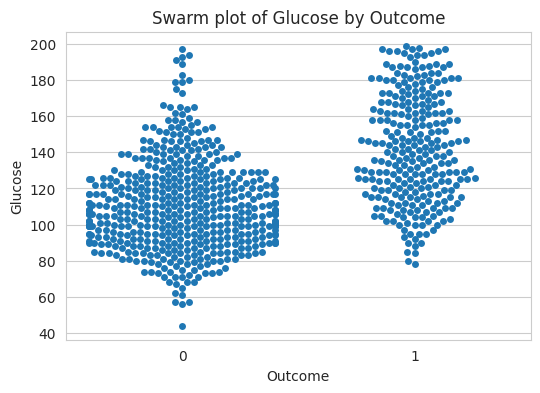

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


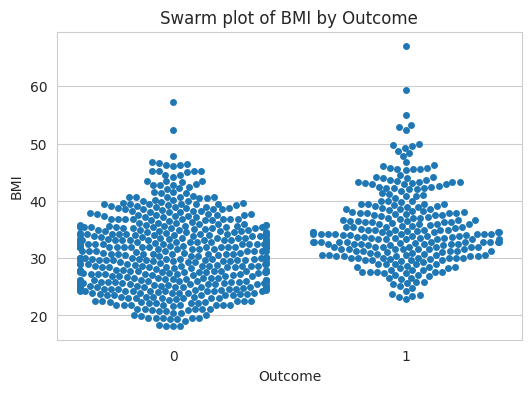

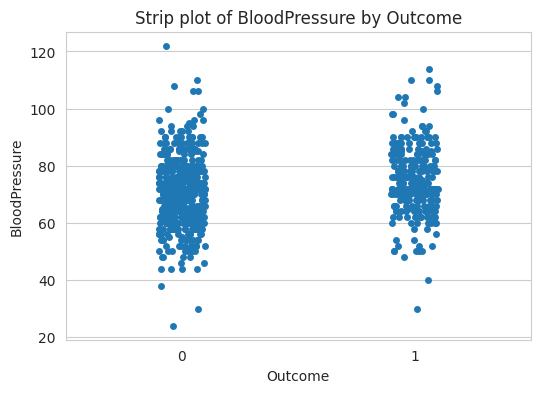

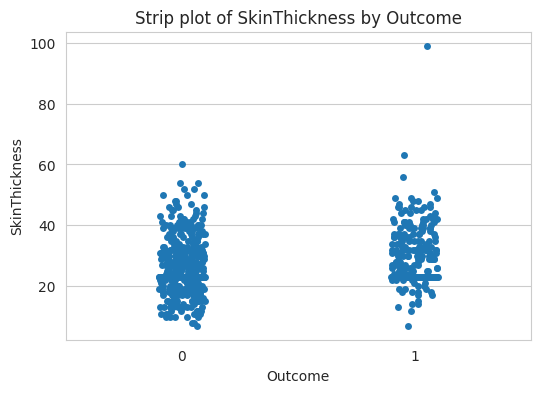

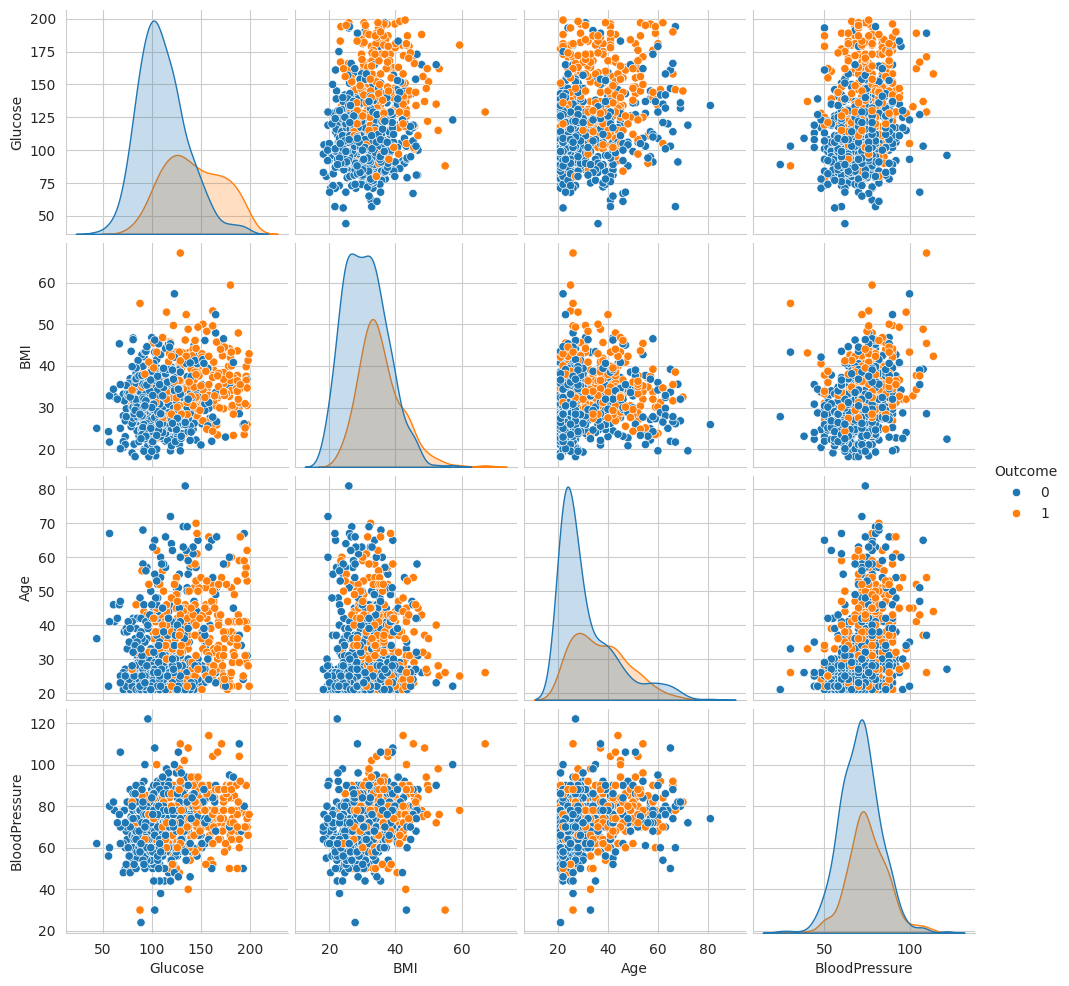

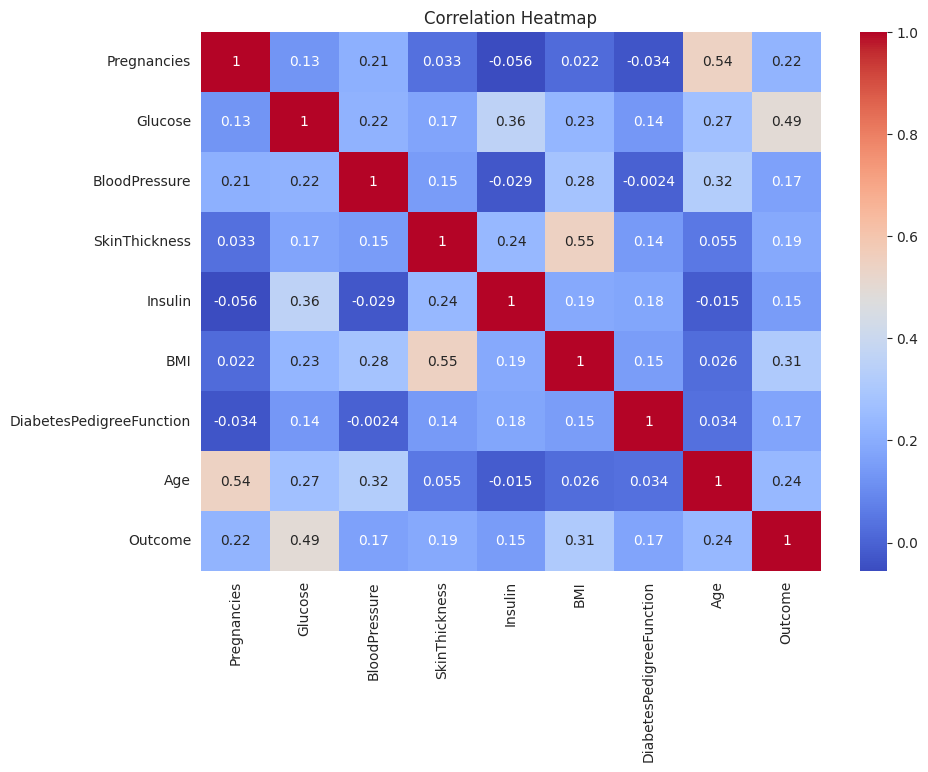

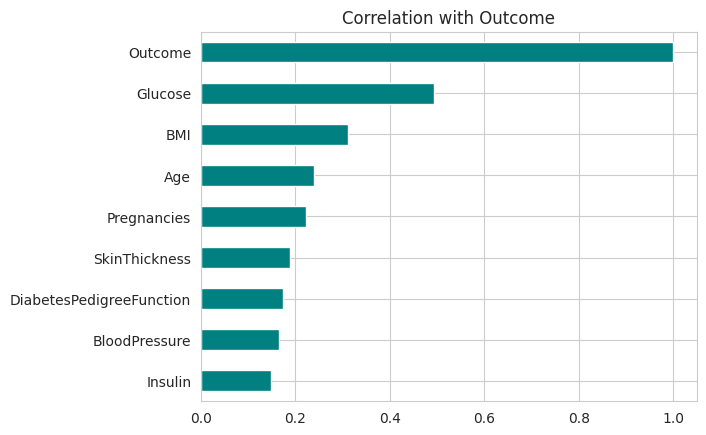

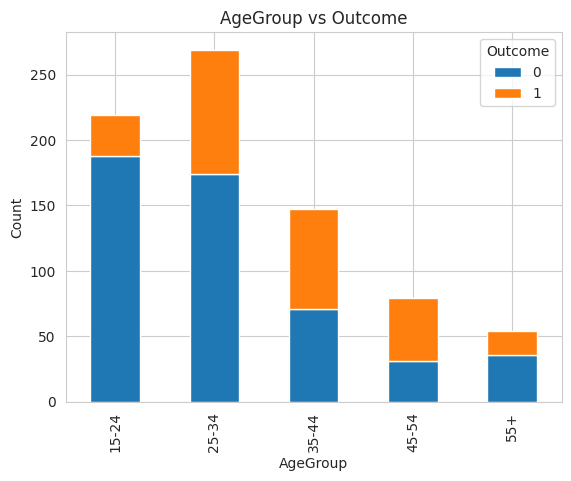

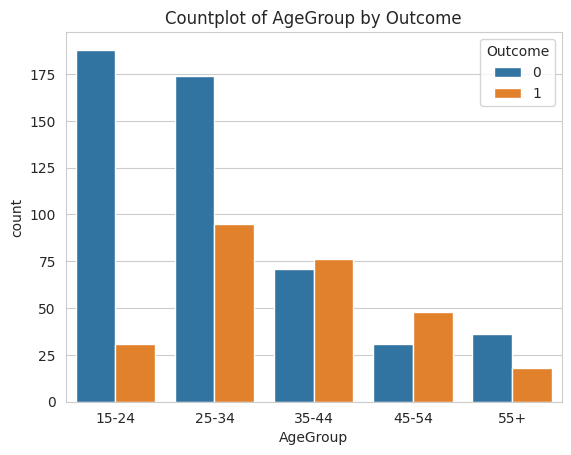

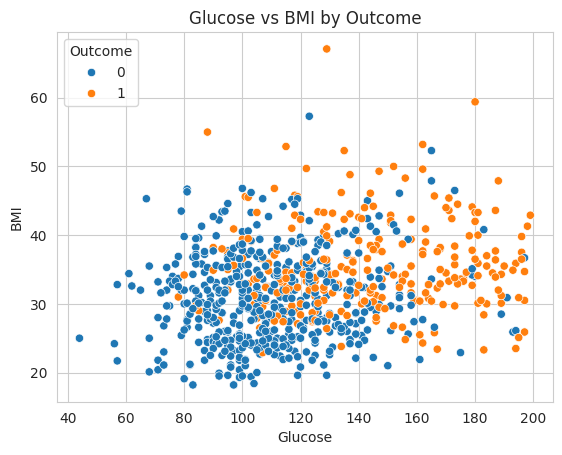

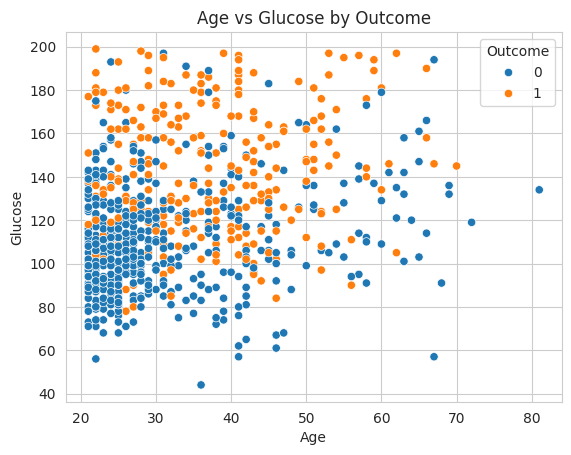

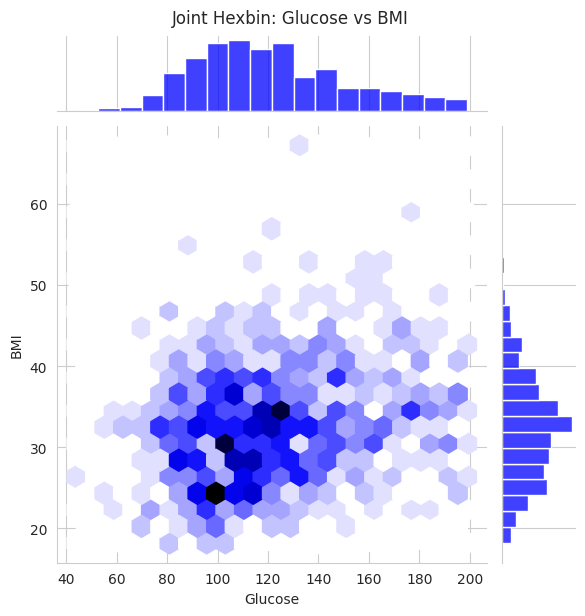

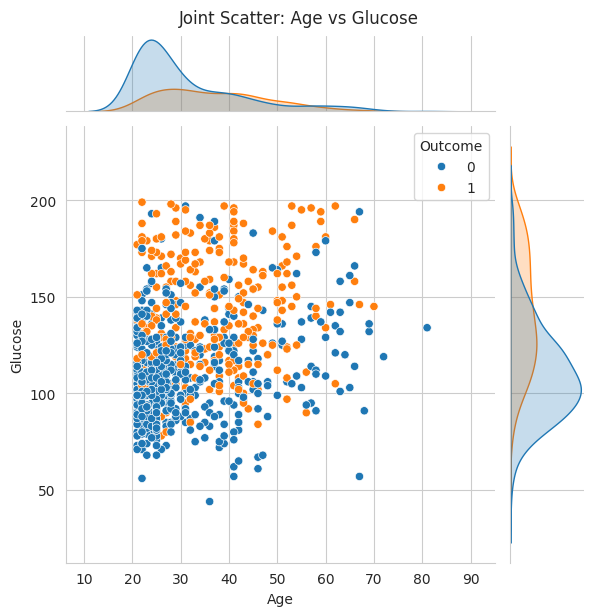

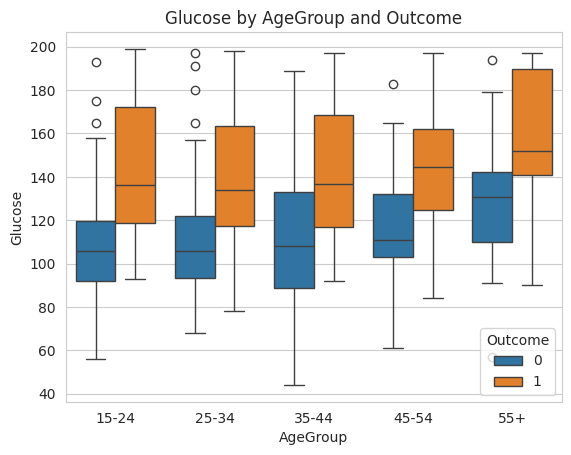

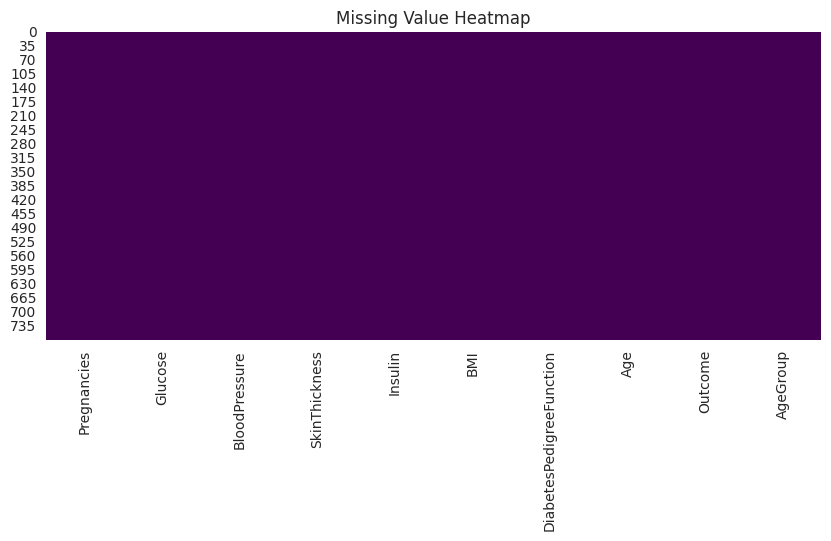


Cross-validation results:
                 Model  CV ROC-AUC
0  LogisticRegression    0.849029
3                 SVC    0.831892
1        RandomForest    0.830144
2    GradientBoosting    0.817014

✅ Best model: LogisticRegression

Test set evaluation:
    Accuracy  Precision    Recall     F1  ROC_AUC
0  0.734375   0.637931  0.552239  0.592  0.83403 

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       125
           1       0.64      0.55      0.59        67

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.73      0.73      0.73       192



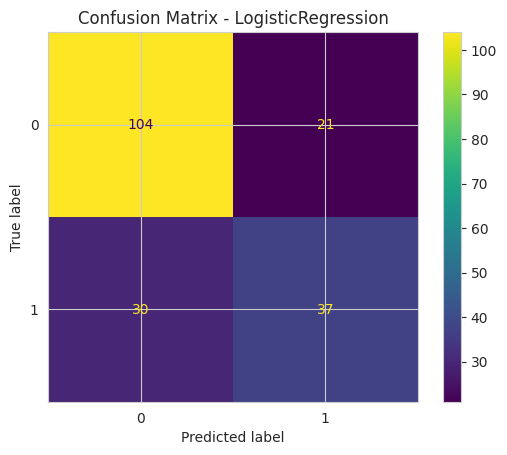

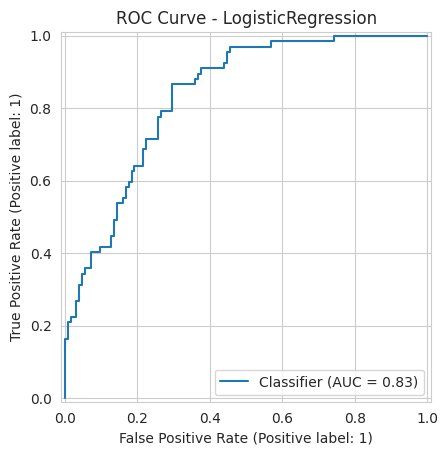

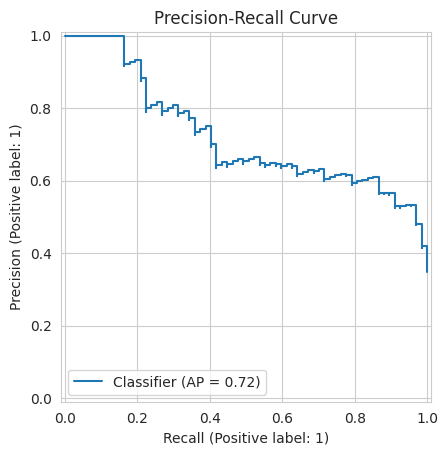

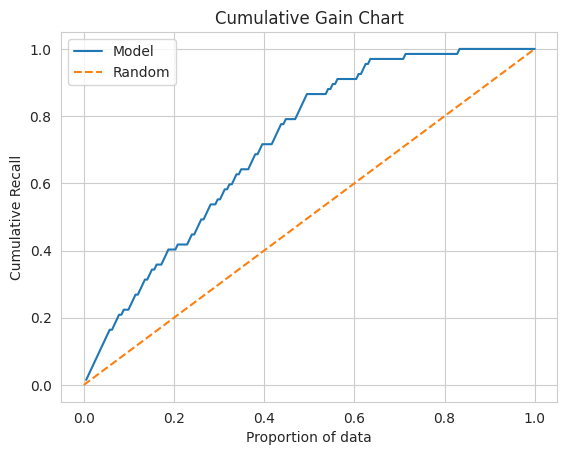


=== Completed Successfully with Extended Graphs (Fixed) ===


In [8]:
#!/usr/bin/env python3
"""
Diabetes Risk Prediction - Extended with More Graphs (Fixed jointplot bug)
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report,
    RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# -------------------- CONFIG --------------------
RANDOM_STATE = 42
DATA_PATH = "/content/diabetes (2).csv"

# -------------------- LOAD --------------------
df = pd.read_csv(DATA_PATH)
df.columns = [c.strip() for c in df.columns]

print("✅ Dataset loaded. Shape:", df.shape)
print(df.head(), "\n")

# -------------------- CLEAN --------------------
zero_na_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for c in zero_na_cols:
    if c in df.columns:
        df[c] = df[c].replace(0, np.nan).fillna(df[c].median())

# Age groups
if 'Age' in df.columns:
    df['AgeGroup'] = pd.cut(df['Age'], bins=[15,25,35,45,55,120], right=False,
                            labels=['15-24','25-34','35-44','45-54','55+'])

# -------------------- BASIC STATS --------------------
print("\nSummary statistics:\n", df.describe().T)

# -------------------- EXPLORATORY GRAPHS --------------------
sns.set_style("whitegrid")

# 1. Histograms
df.hist(bins=20, figsize=(12,10), color="skyblue")
plt.suptitle("Histograms of Features")
plt.show()

# 2. KDE distributions
for c in ['Glucose','BMI','Age']:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=c, hue="Outcome", fill=True)
    plt.title(f"KDE of {c} by Outcome")
    plt.show()

# 3. Outcome distribution
df['Outcome'].value_counts().plot(kind='bar', color='orange')
plt.title("Outcome Distribution")
plt.show()

# 4. Pie chart
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Outcome Distribution (Pie)")
plt.ylabel("")
plt.show()

# 5. Boxplots
for c in [col for col in df.columns if col not in ['Outcome','AgeGroup']]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Outcome", y=c, data=df)
    plt.title(f"{c} by Outcome")
    plt.show()

# 6. Violin plots
for c in ['Glucose','BMI','Age']:
    plt.figure(figsize=(6,4))
    sns.violinplot(x="Outcome", y=c, data=df)
    plt.title(f"Violin plot of {c} by Outcome")
    plt.show()

# 7. Swarm plots
for c in ['Glucose','BMI']:
    plt.figure(figsize=(6,4))
    sns.swarmplot(x="Outcome", y=c, data=df)
    plt.title(f"Swarm plot of {c} by Outcome")
    plt.show()

# 8. Strip plots
for c in ['BloodPressure','SkinThickness']:
    plt.figure(figsize=(6,4))
    sns.stripplot(x="Outcome", y=c, data=df, jitter=True)
    plt.title(f"Strip plot of {c} by Outcome")
    plt.show()

# 9. Pairplot
sns.pairplot(df[['Glucose','BMI','Age','BloodPressure','Outcome']], hue="Outcome")
plt.show()

# 10. Heatmap (correlation)
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 11. Feature correlation with Outcome
cor_target = df.corr(numeric_only=True)['Outcome'].sort_values()
cor_target.plot(kind='barh', color="teal")
plt.title("Correlation with Outcome")
plt.show()

# 12. Stacked bar: AgeGroup vs Outcome
if 'AgeGroup' in df.columns:
    pd.crosstab(df['AgeGroup'], df['Outcome']).plot(kind="bar", stacked=True)
    plt.title("AgeGroup vs Outcome")
    plt.ylabel("Count")
    plt.show()

# 13. Countplot for AgeGroup
if 'AgeGroup' in df.columns:
    sns.countplot(x="AgeGroup", hue="Outcome", data=df)
    plt.title("Countplot of AgeGroup by Outcome")
    plt.show()

# 14. Scatterplots
sns.scatterplot(x="Glucose", y="BMI", hue="Outcome", data=df)
plt.title("Glucose vs BMI by Outcome")
plt.show()

sns.scatterplot(x="Age", y="Glucose", hue="Outcome", data=df)
plt.title("Age vs Glucose by Outcome")
plt.show()

# 15. Joint plots (fixed)
sns.jointplot(data=df, x="Glucose", y="BMI", kind="hex", color="blue")
plt.suptitle("Joint Hexbin: Glucose vs BMI", y=1.02)
plt.show()

sns.jointplot(data=df, x="Age", y="Glucose", kind="scatter", hue="Outcome")
plt.suptitle("Joint Scatter: Age vs Glucose", y=1.02)
plt.show()

# 16. Boxplot grouped by AgeGroup
if 'AgeGroup' in df.columns:
    sns.boxplot(x="AgeGroup", y="Glucose", hue="Outcome", data=df)
    plt.title("Glucose by AgeGroup and Outcome")
    plt.show()

# 17. Missing value heatmap
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

# -------------------- MODEL PREPARATION --------------------
X = df.drop(columns=['Outcome'])
y = df['Outcome'].astype(int)

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
])

# -------------------- MODELS --------------------
models = {
    "LogisticRegression": Pipeline([
        ("pre", preprocessor),
        ("clf", LogisticRegression(max_iter=500))
    ]),
    "RandomForest": Pipeline([
        ("pre", preprocessor),
        ("clf", RandomForestClassifier(n_estimators=300, random_state=RANDOM_STATE))
    ]),
    "GradientBoosting": Pipeline([
        ("pre", preprocessor),
        ("clf", GradientBoostingClassifier(n_estimators=150, random_state=RANDOM_STATE))
    ]),
    "SVC": Pipeline([
        ("pre", preprocessor),
        ("clf", SVC(kernel="rbf", probability=True, random_state=RANDOM_STATE))
    ])
}

# -------------------- CROSS-VALIDATION --------------------
cv_results = []
for name, model in models.items():
    try:
        scores = cross_val_score(model, X, y, cv=3, scoring="roc_auc")
        cv_results.append({"Model": name, "CV ROC-AUC": np.mean(scores)})
    except Exception as e:
        print(f"⚠️ {name} failed: {e}")

cv_df = pd.DataFrame(cv_results).sort_values("CV ROC-AUC", ascending=False)
print("\nCross-validation results:\n", cv_df)

best_model_name = cv_df.iloc[0]["Model"]
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name}")

# -------------------- TRAIN/TEST SPLIT --------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=RANDOM_STATE
)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

# -------------------- EVALUATION --------------------
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1": f1_score(y_test, y_pred),
    "ROC_AUC": roc_auc_score(y_test, y_proba)
}
print("\nTest set evaluation:\n", pd.DataFrame([metrics]), "\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title(f"ROC Curve - {best_model_name}")
plt.show()

# Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_test, y_proba)
plt.title("Precision-Recall Curve")
plt.show()

# Cumulative Gain Chart
df_pred = pd.DataFrame({"y":y_test, "proba":y_proba}).sort_values("proba", ascending=False)
df_pred["cum_rel"] = df_pred["y"].cumsum()/df_pred["y"].sum()
df_pred["pct_data"] = np.arange(1,len(df_pred)+1)/len(df_pred)

plt.plot(df_pred["pct_data"], df_pred["cum_rel"], label="Model")
plt.plot([0,1],[0,1],"--", label="Random")
plt.xlabel("Proportion of data")
plt.ylabel("Cumulative Recall")
plt.title("Cumulative Gain Chart")
plt.legend()
plt.show()

print("\n=== Completed Successfully with Extended Graphs (Fixed) ===")
